In [1]:
import numpy as np
from numpy.linalg import inv, det
import matplotlib.pyplot as plt
from copy import copy
import random
%matplotlib inline 

## Генерация стохастической матрицы

In [2]:
def generate_stochastic_matrix(size):
    matrix = np.random.rand(size, size)
    
    for i in range(size):
        matrix[i] = matrix[i] / np.sum(matrix[i])
        
    return matrix

## Моделирование игры

In [3]:
def model_game(matrix, starter_opinion, epsilon=0.000001):
    prev_opinion = np.zeros(len(starter_opinion))
    cur_opinion = copy(starter_opinion)
    
    cur_matrix = np.eye(matrix.shape[0])
    
    iterations = 0
    
    while np.max(np.abs(cur_opinion - prev_opinion)) > epsilon:
        cur_matrix = cur_matrix.dot(matrix)
        
        prev_opinion = cur_opinion
        
        cur_opinion = cur_matrix.dot(starter_opinion)
        
        iterations += 1
        
    print(f'Iterations passed: {iterations}')
    
    return cur_matrix

## Генерация исходных векторов по заданным параметрам

In [4]:
def distribute_players(players_count, agents_count):
    distr = np.append(list(range(players_count + 1)),
                      np.random.randint(players_count + 1, size=agents_count - players_count - 1))
    
    np.random.shuffle(distr)
    
    return distr

def floating_rand(low, high):
    return random.random() * (high - low) + low

def generate_opinions(distribution, first_limits, second_limits, nobody_limits):
    opinions = []
    
    first_value = floating_rand(*first_limits)
    second_value = floating_rand(*second_limits)
    
    for i in distribution:
        if i == 0:
            value = floating_rand(*nobody_limits)
        elif i == 1:
            value = first_value
        elif i == 2:
            value = second_value
            
        opinions.append(value)
        
    return np.array(opinions)

## Выполнение задания

[[0.062 0.174 0.129 0.012 0.143 0.035 0.108 0.1   0.12  0.118]
 [0.081 0.164 0.11  0.104 0.06  0.117 0.109 0.174 0.079 0.001]
 [0.091 0.029 0.112 0.127 0.18  0.071 0.056 0.063 0.145 0.126]
 [0.067 0.025 0.176 0.131 0.135 0.1   0.06  0.079 0.125 0.103]
 [0.134 0.063 0.096 0.133 0.144 0.052 0.102 0.055 0.123 0.098]
 [0.112 0.145 0.013 0.066 0.13  0.166 0.038 0.085 0.082 0.164]
 [0.136 0.203 0.113 0.054 0.029 0.1   0.199 0.006 0.089 0.07 ]
 [0.169 0.039 0.047 0.109 0.18  0.161 0.111 0.12  0.019 0.045]
 [0.111 0.199 0.019 0.005 0.101 0.114 0.053 0.09  0.215 0.093]
 [0.038 0.15  0.159 0.136 0.109 0.053 0.137 0.06  0.073 0.087]]


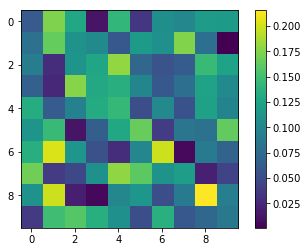

In [5]:
matrix = generate_stochastic_matrix(10)
print(np.round(matrix, 3))
plt.imshow(matrix)
plt.colorbar()
plt.show()

### Агенты со случайным мнением

In [6]:
op = np.random.rand(10) * 20
print(np.round(op, 3))

[11.708  1.225  4.258 15.119  3.196 11.676  7.356  0.8   16.344  6.007]


In [7]:
solution = model_game(matrix, op)
print(np.round(solution, 3))

Iterations passed: 10
[[0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]]


#### Итоговое мнение

In [8]:
print(np.round(solution.dot(op), 3))

[7.645 7.645 7.645 7.645 7.645 7.645 7.645 7.645 7.645 7.645]


### Агенты, распределенные между игроками

In [9]:
first_limits = (-20, -1)
second_limits = (1, 20)
nobody_limits = (-50, 50)

#### Распределение между игроками

In [10]:
distr = distribute_players(2, 10)
print(distr)

[2 1 2 0 0 2 0 0 1 1]


#### Инициализация исходных мнений

In [11]:
op = generate_opinions(distr, first_limits, second_limits, nobody_limits)
print(np.round(op, 3))

[16.214 -4.965 16.214 -2.738 31.502 16.214 46.056  3.309 -4.965 -4.965]


In [12]:
solution = model_game(matrix, op)
print(np.round(solution, 3))

Iterations passed: 11
[[0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]
 [0.1   0.122 0.096 0.087 0.119 0.096 0.097 0.085 0.109 0.089]]


#### Итоговое мнение

In [13]:
print(np.round(solution.dot(op), 3))

[11.413 11.413 11.413 11.413 11.413 11.413 11.413 11.413 11.413 11.413]
